In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import tensorflow.keras as keras
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import plot_model

/home/jacob/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-04-19 22:12:12.629669: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 22:12:12.635452: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 22:12:12.706585: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 22:12:13.812093: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Load train and test data

In [3]:
X_train = pd.read_csv("../data/X_train_lstm.csv")
X_test = pd.read_csv("../data/X_test_lstm.csv")

Y_train = pd.read_csv("../data/Y_train_lstm.csv")
Y_test = pd.read_csv("../data/Y_test_lstm.csv")

Load LSTM model

In [5]:
lstm_model = keras.models.load_model("../models/lstm_model.keras")

In [6]:
Y_pred = lstm_model.predict(X_test)
Y_pred = pd.DataFrame(Y_pred, columns=Y_test.columns)

3827/3827 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step


MSE and MAE

In [7]:
mean_squared_error(Y_test, Y_pred)

358.6709611200713

In [8]:
mean_absolute_error(Y_test, Y_pred)  # mins

9.854460557376626

Standard deviation

In [9]:
for col in Y_pred.columns:
    print(col)
    print(Y_test[col].std(), Y_pred[col].std())

DELAY_DUE_CARRIER
25.567373882084624 6.4759521484375
DELAY_DUE_WEATHER
11.406046218761714 0.791070282459259
DELAY_DUE_SECURITY
2.422932730882158 0.04809405654668808
DELAY_DUE_NAS
19.65953564135109 11.401325225830078
DELAY_DUE_LATE_AIRCRAFT
29.452996135810928 8.593396186828613


Mean of predictions

In [10]:
Y_pred.mean()

DELAY_DUE_CARRIER          15.347479
DELAY_DUE_WEATHER           1.726623
DELAY_DUE_SECURITY          0.073125
DELAY_DUE_NAS              12.568697
DELAY_DUE_LATE_AIRCRAFT    18.048422
dtype: float32

### Plot box plots of predicted test labels and true labels

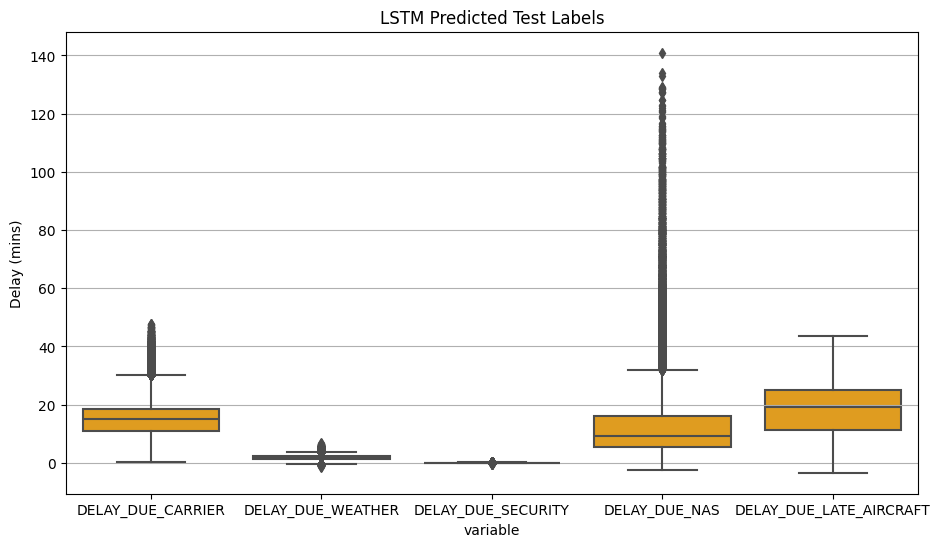

In [11]:
plt.figure(figsize=(11, 6))
plt.grid()
sns.boxplot(Y_pred.melt(), x="variable", y="value", color="orange")
plt.title('LSTM Predicted Test Labels')
plt.ylabel("Delay (mins)")
plt.show()

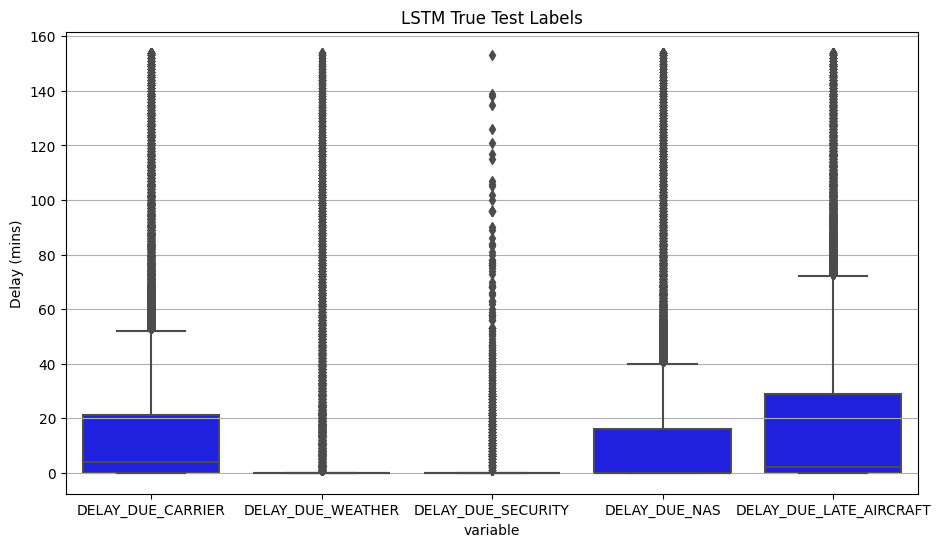

In [17]:
plt.figure(figsize=(11, 6))
plt.grid()
sns.boxplot(Y_test.melt(), x="variable", y="value", color="blue")
plt.title('LSTM True Test Labels')
plt.ylabel("Delay (mins)")
plt.show()

In [26]:
hybrid_model = keras.models.load_model("../models/hybrid_model.keras")

In [33]:
plot_model(hybrid_model,to_file="hybrid_model_architecture.png", show_shapes=True, show_layer_names=False)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [34]:
Y_pred = hybrid_model.predict(X_test)

3827/3827 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step


In [35]:
mean_squared_error(Y_test, Y_pred)

375.7390716937697

In [36]:
mean_absolute_error(Y_test, Y_pred)

9.817848793736191